<a href="https://colab.research.google.com/github/abiraaaaaaf/Python-Introduction/blob/main/Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

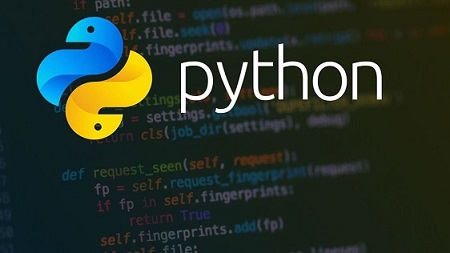

#Pandas

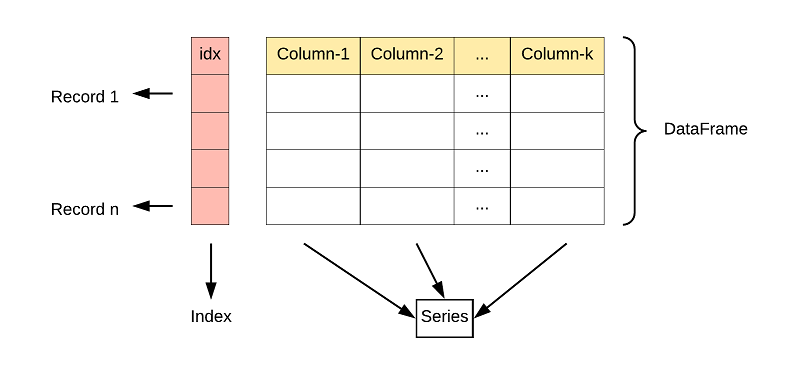

Pandas has so many uses that it might make sense to list the things it can't do instead of what it can do.

This tool is essentially your data’s home. Through pandas, you get acquainted with your data by cleaning, transforming, and analyzing it.

For example, say you want to explore a dataset stored in a CSV on your computer. Pandas will extract the data from that CSV into a DataFrame — a table, basically — then let you do things like:

- Calculate statistics and answer questions about the data, like
What's the average, median, max, or min of each column?
- Does column A correlate with column B?
- What does the distribution of data in column C look like?
- Clean the data by doing things like removing missing values and filtering rows or columns by some criteria
- Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more.
- Store the cleaned, transformed data back into a CSV, other file or database

In [1]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

In [2]:
import pandas as pd
purchases = pd.DataFrame(data)
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [3]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [18]:
purchases.loc['David']

apples     1
oranges    2
Name: David, dtype: int64

In [4]:
purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

In [6]:
purchases.head(2)

,apples,oranges
June,3,0
Robert,2,3


In [7]:
purchases.tail(3)

,apples,oranges
Robert,2,3
Lily,0,7
David,1,2


In [8]:
purchases.shape

(4, 2)

In [10]:
purchases.dtypes

apples     int64
oranges    int64
dtype: object

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [19]:
purchases.describe()

,apples,oranges
count,4.000000,4.00000
mean,1.500000,3.00000
std,1.290994,2.94392
min,0.000000,0.00000
25%,0.750000,1.50000
50%,1.500000,2.50000
75%,2.250000,4.00000
max,3.000000,7.00000


In [12]:
purchases.columns

Index(['apples', 'oranges'], dtype='object')

In [14]:
purchases.index

Index(['June', 'Robert', 'Lily', 'David'], dtype='object')

In [51]:
import warnings
warnings.filterwarnings('ignore')

#A Decision Tree Example



In [29]:
# Run this program on your local python
# interpreter, provided you have installed
# the required libraries.
  
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

##Confusion Matrix

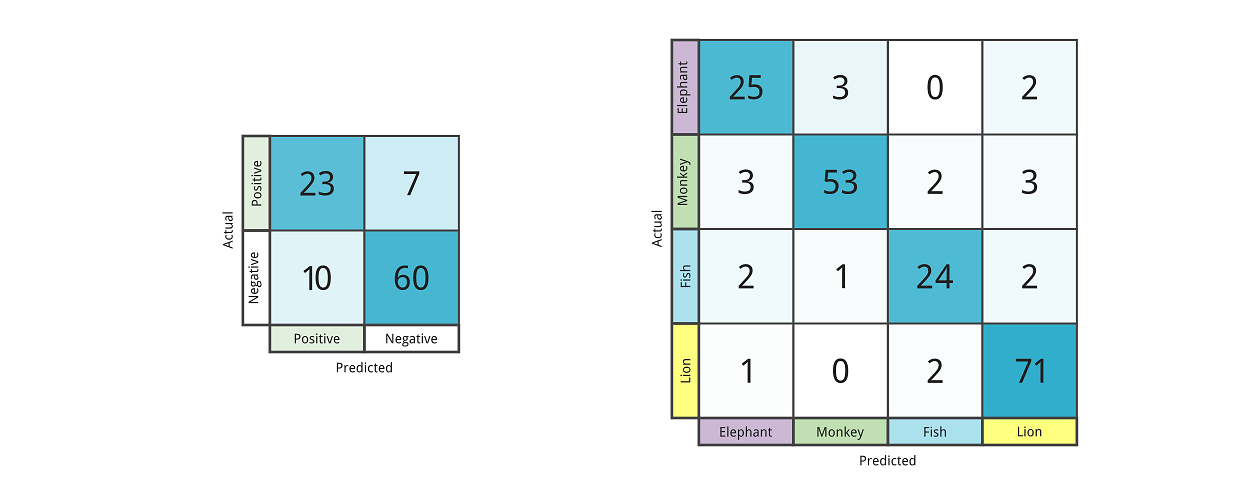

In [22]:
# Function importing Dataset
def importdata():
    balance_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
    sep= ',', header = None)
      
    # Printing the dataswet shape
    print ("Dataset Length: ", len(balance_data))
    print ("Dataset Shape: ", balance_data.shape)
      
    return balance_data

In [23]:
# Building Phase
data = importdata()

Dataset Length:  625
Dataset Shape:  (625, 5)


In [25]:
data.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [66]:
data.describe()

,1,2,3,4
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [28]:
# Function to split the dataset
def splitdataset(balance_data):
  
    # Separating the target variable
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test

In [30]:
X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

In [33]:
X

array([[1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 3],
       ...,
       [5, 5, 5, 3],
       [5, 5, 5, 4],
       [5, 5, 5, 5]], dtype=object)

In [34]:
Y

array(['B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L',
       'B', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L',
       'B', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L',
       'B', 'R', 'L', 'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L',
       'B', 'L', 'L', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'L', 'R',
       'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'L', 'B', 'R', 'R', 'R',
       'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'B', 'R', 'L',
       'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L

In [67]:
print(len(X), len(Y))

625 625


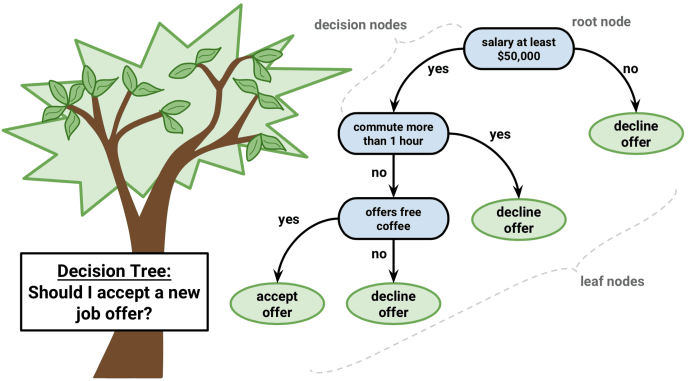

For solving this attribute selection problem, researchers worked and devised some solutions. They suggested using some criteria like :

- Entropy
- Information gain
- Gini index
- Gain Ratio
- Reduction in Variance
- Chi-Square

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [36]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [37]:
clf_gini = train_using_gini(X_train, X_test, y_train)

In [41]:
# Function to perform training with entropy.
def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [42]:
clf_entropy = train_using_entropy(X_train, X_test, y_train)

In [43]:
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    
    return y_pred

In [46]:
# Operational Phase
print("Results Using Gini Index:")
  
# Prediction using gini
y_pred_gini = prediction(X_test, clf_gini)
print('Lengthes: ', len(X_test), len(y_pred_gini))

Results Using Gini Index:
Predicted values:
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
Lengthes:  188 188


In [57]:
confusion_matrix(y_test, y_pred_gini)

array([[ 0,  6,  7],
       [ 0, 67, 18],
       [ 0, 19, 71]])

In [55]:
print("Accuracy : ", accuracy_score(y_test, y_pred_gini)*100)

Accuracy :  73.40425531914893


In [56]:
print("Report : ", classification_report(y_test, y_pred_gini))

Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.73      0.79      0.76        85
           R       0.74      0.79      0.76        90

    accuracy                           0.73       188
   macro avg       0.49      0.53      0.51       188
weighted avg       0.68      0.73      0.71       188



The reported averages include **macro average** (averaging the unweighted mean per label), **weighted average** (averaging the support-weighted mean per label), and **sample average** (only for multilabel classification). **Micro average** (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise and would be the same for all metrics. 

- Top-1
- Top-k

In [58]:
print("Results Using Entropy:")

# Prediction using entropy
y_pred_entropy = prediction(X_test, clf_entropy)

Results Using Entropy:
Predicted values:
['R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L'
 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L'
 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'R']


In [59]:
confusion_matrix(y_test, y_pred_entropy)

array([[ 0,  6,  7],
       [ 0, 63, 22],
       [ 0, 20, 70]])

In [60]:
print("Accuracy : ", accuracy_score(y_test,y_pred_entropy)*100)

Accuracy :  70.74468085106383


In [62]:
print("Report : ", classification_report(y_test, y_pred_entropy))

Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.71      0.74      0.72        85
           R       0.71      0.78      0.74        90

    accuracy                           0.71       188
   macro avg       0.47      0.51      0.49       188
weighted avg       0.66      0.71      0.68       188



##Another Example: 

In [78]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [79]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", names=col_names)

In [80]:
pima.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1


In [71]:
pima[1:].head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1
10,8,125,96,0,0,0,0.232,54,1


In [72]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[1:][feature_cols] # Features
y = pima[1:].label # Target variable

In [73]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [74]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

https://pypi.org/project/pydotplus/

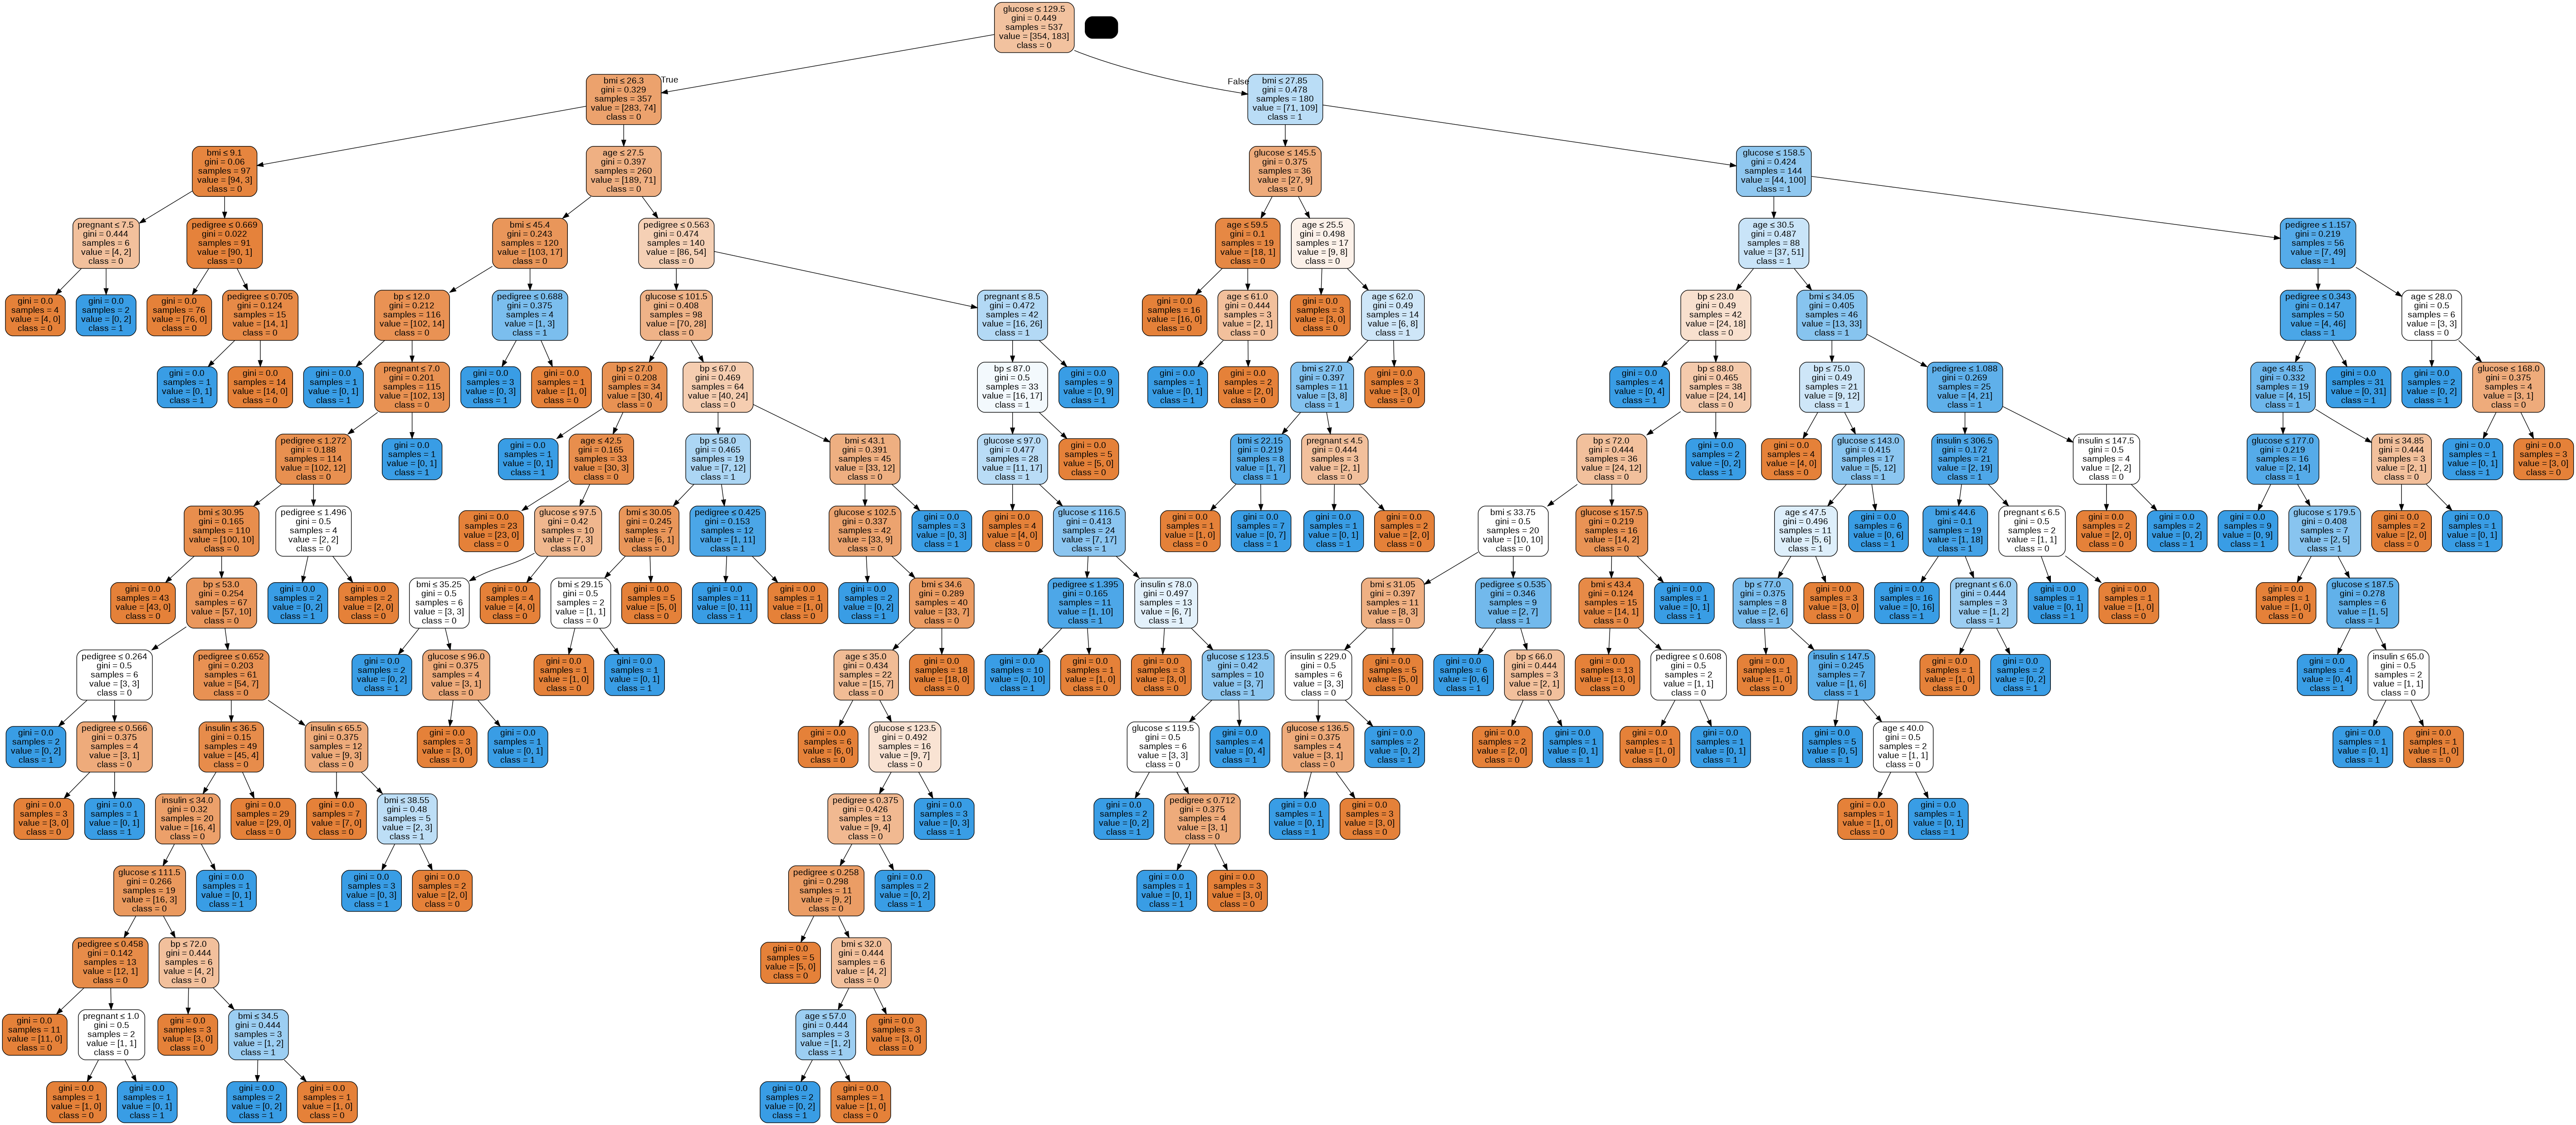

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [75]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [76]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


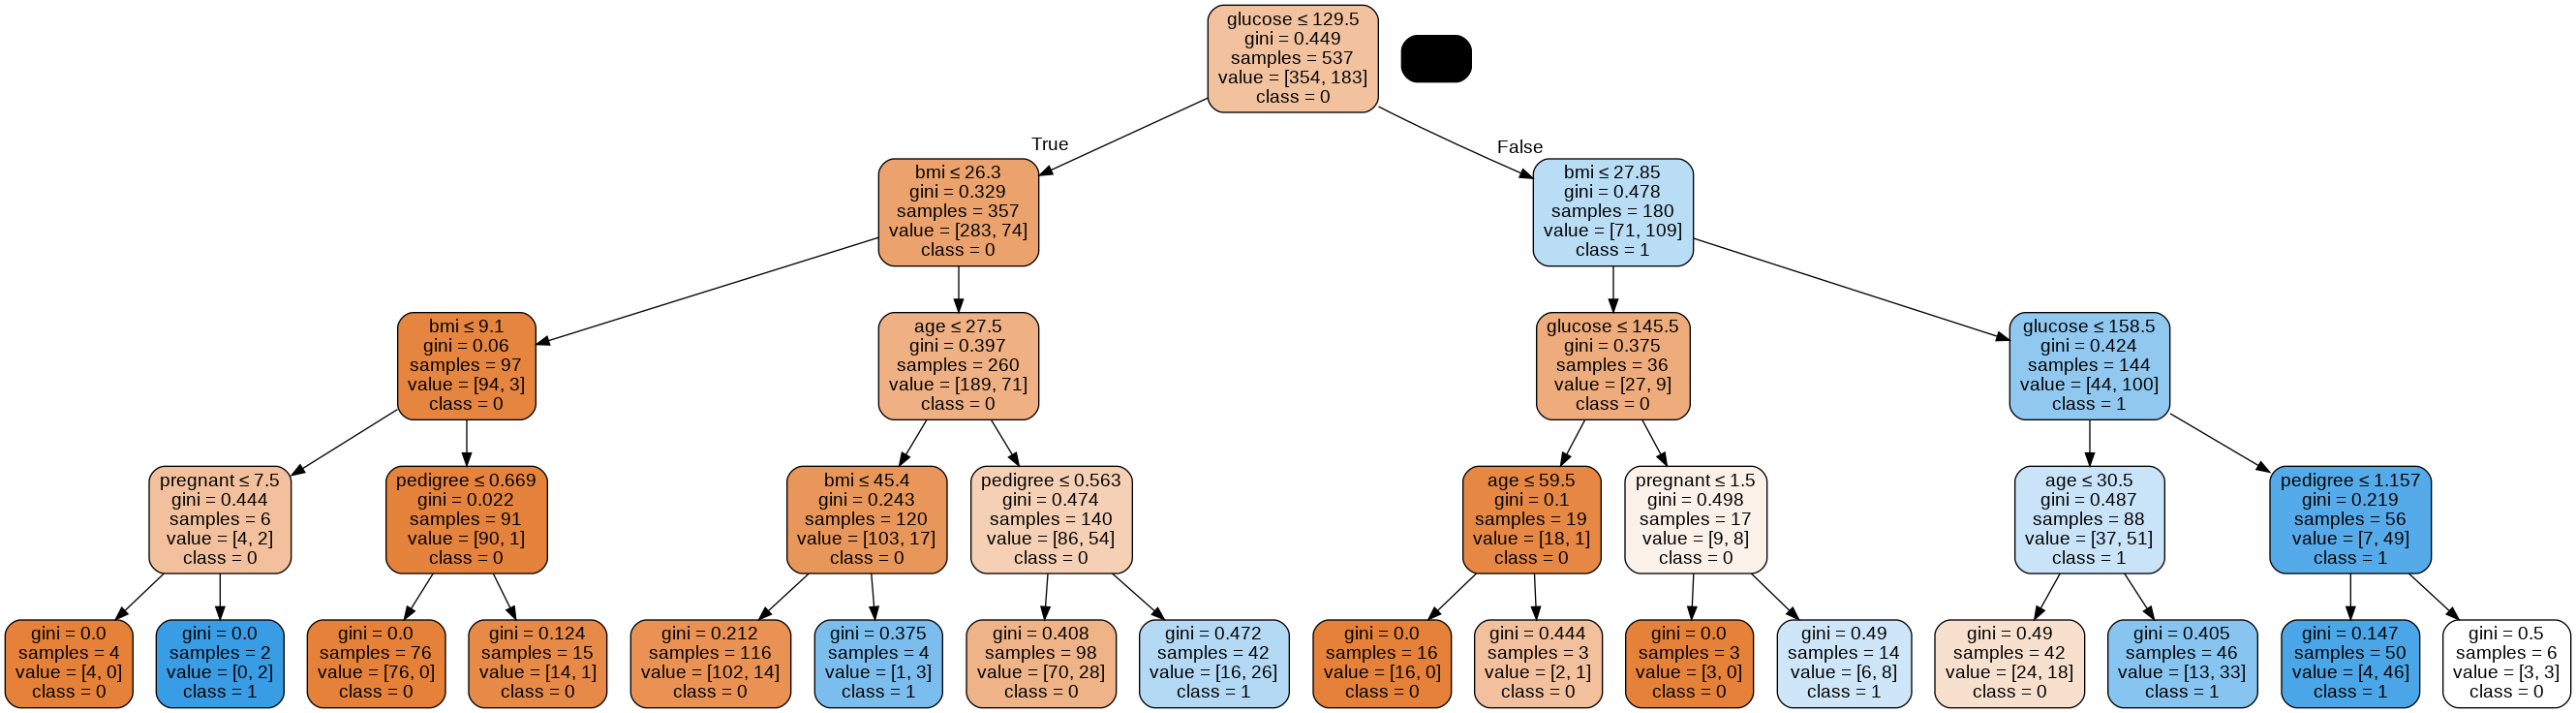

In [77]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png())

#Classification vs. Regression

Fundamentally, classification is about predicting a label and regression is about predicting a quantity. That **classification** is the problem of predicting a **discrete class label output** for an example. That **regression** is the problem of predicting a **continuous quantity output** for an example.

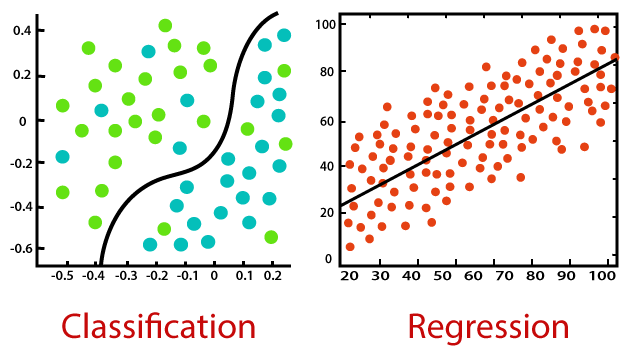

#SVM
What is the Support Vector Machine?
“Support Vector Machine” (SVM) is a **supervised machine learning algorithm** that can be used for both **classification** or **regression** challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding **the hyper-plane that differentiates the two classes very well** (look at the below snapshot).

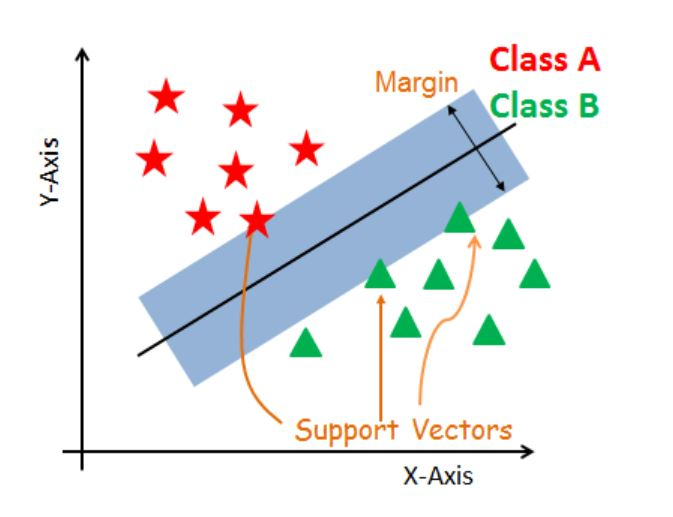

Loading Data

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

Exploring Data

In [ ]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [ ]:
cancer.data.shape

(569, 30)

Let's check top 5 records of the feature set.

In [ ]:
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

Let's take a look at the target set.

In [ ]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

Generating Model (Kernel Linear)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Evaluating the Model

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


Generating Model (Kernel Polynomial)

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9181286549707602
Precision: 0.8852459016393442
Recall: 1.0


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9239766081871345
Precision: 0.8925619834710744
Recall: 1.0


#Assignments:


- Read the 'bill.csv' file and use **decision tree** and **svm** to classify each record. Try to set the parameters in a way that get the best results you can achieve.

- All the statistical analysis that you have learned in this session should be applied to better understand this data.

- In the end point out when your model is overfitted, optimal or underfitted. 

Good luck!